In [1]:
#import library
import pandas as pd
import numpy as np
import re
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [2]:
#import the clean dataset
df=pd.read_csv('./mudah_property_clean.csv')

In [3]:
#data preprocess
#correct invalid data
df[['Bedroom','Bathroom','SquareFeet']]=df[['Bedroom','Bathroom','SquareFeet']].replace(0,np.nan)
df['Bedroom'] = df['Bedroom'].fillna(df.groupby('Type')['Bedroom'].transform('median')).astype('int')
df['Bathroom'] = df['Bathroom'].fillna(df.groupby('Type')['Bathroom'].transform('median')).astype('int')
df['SquareFeet'] = df['SquareFeet'].fillna(df.groupby('Type')['SquareFeet'].transform('median')).astype('int')

In [4]:
#remove outliers
#z-score for price,bedroom,bathroom,sqft and carpark
z_scores = stats.zscore(df[['Price','Bedroom','Bathroom','SquareFeet','Carpark']])
abs_z_scores = np.abs(z_scores)

#create a dataframe for the z scores
df_z=pd.DataFrame({'z-score_price':abs_z_scores[:,0],'z-score_bedroom':abs_z_scores[:,1],
                   'z-score_bathroom':abs_z_scores[:,2],'z-score_sqft':abs_z_scores[:,3],
                   'z-score_carpark':abs_z_scores[:,4]})

#merge the z-score dataframe with the original dataframe
df_new=pd.concat([df,df_z],axis=1)

#z-score higher than 3 will be removed
df_new=df_new[(df_new['z-score_price']<3)&(df_new['z-score_bedroom']<3)&(df_new['z-score_bathroom']<3)&
      (df_new['z-score_sqft']<3)&(df_new['z-score_carpark']<3)]

#after remove the outlier, remove the z-score columns 
df_new=df_new.drop(['z-score_price','z-score_bedroom','z-score_bathroom','z-score_sqft','z-score_carpark'],axis=1)

In [5]:
#price as target variable
#sqft,bathroom,bedroom,carpark,title,state,oth_info and type as independent variables
dummies = pd.get_dummies(df_new[['Type','Title','Oth_Info','State']],drop_first=True)
df_dummy = df_new.drop(['Type','Title','Oth_Info','State','Area','Facilities'],axis=1)
df_dummy = pd.concat([df_dummy,dummies],axis=1)
X = df_dummy.drop(['Price'],axis=1)
y = df_dummy['Price']

#split into train test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [6]:
#ANN regression model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [7]:
model = Sequential()

model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Instructions for updating:
Use tf.cast instead.
Train on 25904 samples, validate on 11103 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/400
25904/25904 [==============================] - 4s 152us/sample - loss: 444279543614.4583 - val_loss: 399134221786.5096
Epoch 2/400
25904/25904 [==============================] - 1s 34us/sample - loss: 169194988967.1353 - val_loss: 126824875644.8297
Epoch 3/400
25904/25904 [==============================] - 1s 35us/sample - loss: 115553927800.4892 - val_loss: 110021181683.4801
Epoch 4/400
25904/25904 [==============================] - 1s 34us/sample - loss: 100223035519.7628 - val_loss: 97197230035.9153
Epoch 5/400
25904/25904 [==============================] - 1s 34us/sample - loss: 88977505452.6695 - val_loss: 89207703901.9105
Epoch 6/400
25904/25904 [==============================] - 1s 34us/sample - loss: 81564014145.4626 - val_loss: 84023105066.5629
Epoch 7/400
25904/25904 [==============================] - 1s 35us/sample - lo

25904/25904 [==============================] - 1s 33us/sample - loss: 59234576678.7400 - val_loss: 70914133499.1581
Epoch 61/400
25904/25904 [==============================] - 1s 33us/sample - loss: 59171114928.9389 - val_loss: 70672220053.5697
Epoch 62/400
25904/25904 [==============================] - 1s 34us/sample - loss: 59203039335.7282 - val_loss: 70830566786.1558
Epoch 63/400
25904/25904 [==============================] - 1s 33us/sample - loss: 59072615713.0476 - val_loss: 70665546733.0934
Epoch 64/400
25904/25904 [==============================] - 1s 39us/sample - loss: 59308622434.9846 - val_loss: 70576060631.2586
Epoch 65/400
25904/25904 [==============================] - 1s 39us/sample - loss: 59143673654.8684 - val_loss: 70671875991.2298
Epoch 66/400
25904/25904 [==============================] - 1s 39us/sample - loss: 59049839129.6158 - val_loss: 70661165144.1693
Epoch 67/400
25904/25904 [==============================] - 1s 36us/sample - loss: 59247490545.7690 - val_loss

25904/25904 [==============================] - 1s 33us/sample - loss: 57677106554.2285 - val_loss: 68737756051.8174
Epoch 124/400
25904/25904 [==============================] - 1s 33us/sample - loss: 57721420127.6640 - val_loss: 68617224986.9995
Epoch 125/400
25904/25904 [==============================] - 1s 33us/sample - loss: 57602122511.0216 - val_loss: 68987791712.8618
Epoch 126/400
25904/25904 [==============================] - 1s 35us/sample - loss: 57716428696.2718 - val_loss: 68387932823.1145
Epoch 127/400
25904/25904 [==============================] - 1s 34us/sample - loss: 57603964988.7190 - val_loss: 68828973771.8685
Epoch 128/400
25904/25904 [==============================] - 1s 33us/sample - loss: 57591478312.4793 - val_loss: 68172972276.2180
Epoch 129/400
25904/25904 [==============================] - 1s 33us/sample - loss: 57581594250.8314 - val_loss: 68639279262.4466
Epoch 130/400
25904/25904 [==============================] - 1s 34us/sample - loss: 57463350029.7566 - v

25904/25904 [==============================] - 1s 39us/sample - loss: 53064844169.7245 - val_loss: 59954532361.9605
Epoch 187/400
25904/25904 [==============================] - 1s 33us/sample - loss: 53097476250.3274 - val_loss: 60132443546.5038
Epoch 188/400
25904/25904 [==============================] - 1s 33us/sample - loss: 52982935977.0327 - val_loss: 59746030177.4382
Epoch 189/400
25904/25904 [==============================] - 1s 33us/sample - loss: 52942281755.1970 - val_loss: 59335116685.0848
Epoch 190/400
25904/25904 [==============================] - 1s 36us/sample - loss: 52672334489.3786 - val_loss: 59565775707.7431
Epoch 191/400
25904/25904 [==============================] - 1s 35us/sample - loss: 52691023288.8450 - val_loss: 59576575097.8323
Epoch 192/400
25904/25904 [==============================] - 1s 37us/sample - loss: 52664410992.4250 - val_loss: 59100385961.3755
Epoch 193/400
25904/25904 [==============================] - 1s 34us/sample - loss: 52621144015.9308 - v

Epoch 249/400
25904/25904 [==============================] - 1s 34us/sample - loss: 51526855800.8054 - val_loss: 57741919143.7384
Epoch 250/400
25904/25904 [==============================] - 1s 33us/sample - loss: 51507374050.9055 - val_loss: 57730821900.8888
Epoch 251/400
25904/25904 [==============================] - 1s 40us/sample - loss: 51378656994.1149 - val_loss: 57466094637.8370
Epoch 252/400
25904/25904 [==============================] - 1s 40us/sample - loss: 51416653474.8660 - val_loss: 57540514236.5357
Epoch 253/400
25904/25904 [==============================] - 1s 38us/sample - loss: 51432436594.9549 - val_loss: 57026997142.7686
Epoch 254/400
25904/25904 [==============================] - 1s 35us/sample - loss: 51258791818.3570 - val_loss: 57305683536.0072
Epoch 255/400
25904/25904 [==============================] - 1s 34us/sample - loss: 51459508847.6343 - val_loss: 57292763899.6423
Epoch 256/400
25904/25904 [==============================] - 1s 33us/sample - loss: 514251

Epoch 312/400
25904/25904 [==============================] - 1s 36us/sample - loss: 50097923312.9784 - val_loss: 55280598651.1696
Epoch 313/400
25904/25904 [==============================] - 1s 35us/sample - loss: 50361828065.4824 - val_loss: 55751019129.9706
Epoch 314/400
25904/25904 [==============================] - 1s 35us/sample - loss: 50404025154.8857 - val_loss: 55429982448.7133
Epoch 315/400
25904/25904 [==============================] - 1s 36us/sample - loss: 50266969086.1025 - val_loss: 56096602367.8386
Epoch 316/400
25904/25904 [==============================] - 1s 36us/sample - loss: 50220368023.7974 - val_loss: 56009626834.7394
Epoch 317/400
25904/25904 [==============================] - 1s 38us/sample - loss: 50175741234.7573 - val_loss: 55369631592.1938
Epoch 318/400
25904/25904 [==============================] - 1s 41us/sample - loss: 50209304560.8203 - val_loss: 55257454357.5581
Epoch 319/400
25904/25904 [==============================] - 1s 42us/sample - loss: 501379

Epoch 375/400
25904/25904 [==============================] - 1s 48us/sample - loss: 49208330630.8783 - val_loss: 54085375786.5860
Epoch 376/400
25904/25904 [==============================] - 1s 35us/sample - loss: 49270973401.4182 - val_loss: 54297253395.5061
Epoch 377/400
25904/25904 [==============================] - 1s 38us/sample - loss: 49381424587.8196 - val_loss: 54038708044.3412
Epoch 378/400
25904/25904 [==============================] - 1s 53us/sample - loss: 49169890214.8190 - val_loss: 54076677352.3206
Epoch 379/400
25904/25904 [==============================] - 1s 55us/sample - loss: 49147664879.8715 - val_loss: 53988807616.2709
Epoch 380/400
25904/25904 [==============================] - ETA: 0s - loss: 48994185307.701 - 1s 40us/sample - loss: 49228928810.2187 - val_loss: 54018699371.3526
Epoch 381/400
25904/25904 [==============================] - 1s 44us/sample - loss: 49273444178.6980 - val_loss: 54516904084.6704
Epoch 382/400
25904/25904 [=============================

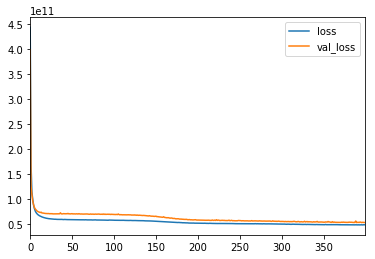

In [9]:
losses = pd.DataFrame(model.history.history)
losses.plot()

Text(0, 0.5, 'Predicted Y')

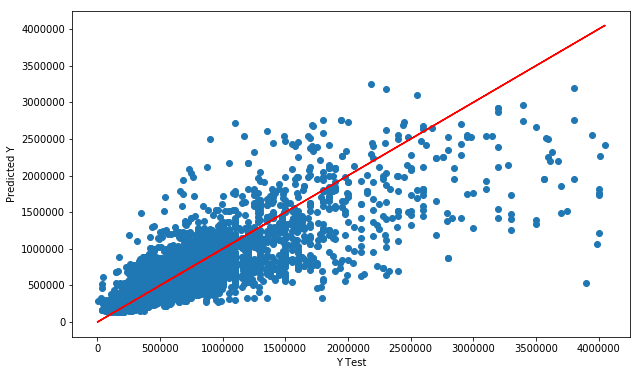

In [10]:
#scatter plot of prediction and y_test for ANN regression model
predictions_ann = model.predict(X_test)

plt.figure(figsize=(10,6))
plt.scatter(y_test,predictions_ann)
plt.plot(y_test,y_test,'r')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [11]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,explained_variance_score

#evaluate ANN regression model
print('MAE:', mean_absolute_error(y_test, predictions_ann))
print('MSE:', mean_squared_error(y_test, predictions_ann))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions_ann)))
print('R2 error:',r2_score(y_test, predictions_ann))

MAE: 130021.4541860871
MSE: 53716288911.300964
RMSE: 231767.74778061974
R2 error: 0.6864867078429358


In [12]:
#save the model
from tensorflow.keras.models import load_model
model.save('model.pkl')

#save the scaler
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [13]:
#load model
regressor_model=load_model('model_1.pkl')

#load scaler
scaler = pickle.load(open('scaler.pkl', 'rb'))

In [18]:
i=233
new_house = df_dummy.drop('Price',axis=1).iloc[i]
new_house= scaler.transform(new_house.values.reshape(-1,9))

In [19]:
regressor_model.predict(new_house)

array([[1913739.]], dtype=float32)

In [20]:
df_new['Price'].iloc[i]

2000000